# Graphs: Basic Operations

**Set up the Data**


*  Construct Directed Graph
*  Show Graph



In [0]:
import scipy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix # csr = Compressed Sparse Row matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import scipy.optimize as opt

In [0]:
G = nx.DiGraph()
G.add_edge('s','a')
G.add_edge('s','b')
G.add_edge('a','c')
G.add_edge('a','b')
G.add_edge('b','c')
G.add_edge('b','t')
G.add_edge('c','t')

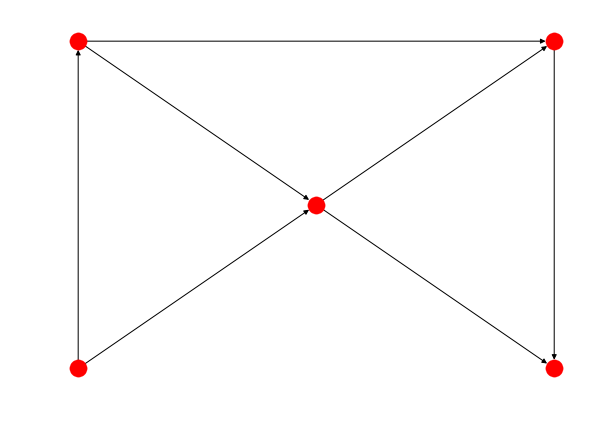

In [40]:
fixed_positions = {'s':(0,0), 'a':(0,2), 'b':(1,1), 'c':(2,2), 't':(2,0)}
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G, pos=fixed_positions, fixed=fixed_nodes)
nx.draw(G, pos)
plt.show()

**Get cycles** (if any)

In [41]:
[print(i) for i in nx.simple_cycles(G)]

[]

**Get Adjacency Matrix A**

Option 1

In [42]:
A1 = nx.adjacency_matrix(G)
print(A1.todense())
print('Adjacency Matrix dimensions (rowsxcols): ', A1.shape)

[[0 1 1 0 0]
 [0 0 1 1 0]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]]
Adjacency Matrix dimensions (rowsxcols):  (5, 5)


Option 2

In [43]:
A2 = nx.to_scipy_sparse_matrix(G, nodelist=['s', 'a', 'b', 'c', 't'])
print(A2.todense())

[[0 1 1 0 0]
 [0 0 1 1 0]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]]


**Get Incidence Matrix B**

A Note on notation convention:

`+` is used for edge pointing twoards vertex

`-` is used for edge pointing away from vertex

In [51]:
B = nx.incidence_matrix(G, oriented=True) # returns a SciPy sparse matrix
print(B.todense())
print('Incidence Matrix dimensions (rowsxcols): ', B.shape, '\n')

[[-1. -1.  0.  0.  0.  0.  0.]
 [ 1.  0. -1. -1.  0.  0.  0.]
 [ 0.  1.  0.  1. -1. -1.  0.]
 [ 0.  0.  1.  0.  1.  0. -1.]
 [ 0.  0.  0.  0.  0.  1.  1.]]
Incidence Matrix dimensions (rowsxcols):  (5, 7) 



**Get Laplacian Matrix from Adjacency Matrix A** 

Note that this Laplacian does not appear to be useful!

In [57]:
L, D = scipy.sparse.csgraph.laplacian(csgraph=A1, return_diag=True, use_out_degree=True) 
L = L.todense()
print('\nLaplacian matrix from option 1\n\n', L,'\n\nThis Laplacian does not appear to be useful.')


Laplacian matrix from option 1

 [[ 2 -1 -1  0  0]
 [ 0  2 -1 -1  0]
 [ 0  0  2 -1 -1]
 [ 0  0  0  1 -1]
 [ 0  0  0  0  0]] 

This Laplacian does not appear to be useful.


**Get Laplacian Matrix from Incidence Matrix B**

Important: the order of the matrix multiplication depends on the shape of the incidence matrix:


*   if nodes are rows and edges are columns: `B * B.T`
*   if edges are rows and nodes are columns: `B.T * B`



In [55]:
L = B * B.T
L = L.todense()
print('Laplacian Matrix of the node -> edges incidence matrix of G:\n\n', L)

Laplacian Matrix of the node -> edges incidence matrix of G:

 [[ 2. -1. -1.  0.  0.]
 [-1.  3. -1. -1.  0.]
 [-1. -1.  4. -1. -1.]
 [ 0. -1. -1.  3. -1.]
 [ 0.  0. -1. -1.  2.]]
